<a href="https://colab.research.google.com/github/Josaphat12-tech/Deep-Learning--And-For-Real-Beginners/blob/main/Transfert_Learning_With_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import PIL.Image as Image
import cv2
import os
import tensorflow_hub as hub

In [131]:
IMAGE_SHAPE = (224,224)
classifier = tf.keras.Sequential([hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",input_shape = IMAGE_SHAPE+(3,))])

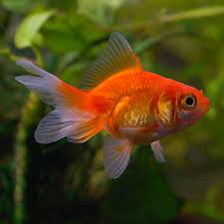

In [132]:
# importing modules
import urllib.request
  
urllib.request.urlretrieve(
  'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcShlIh-1bOnEzZJfAVIYRjT4L5nUJP-aUUVzw&usqp=CAU',
   "fish.jpg")
  
gold_fish = Image.open("fish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [133]:
gold_fish = np.array(gold_fish)/255
gold_fish.shape

(224, 224, 3)

In [134]:
gold_fish

array([[[0.2627451 , 0.34901961, 0.0627451 ],
        [0.29019608, 0.37647059, 0.08235294],
        [0.32941176, 0.41960784, 0.11372549],
        ...,
        [0.31764706, 0.38823529, 0.        ],
        [0.31764706, 0.38823529, 0.        ],
        [0.29803922, 0.37647059, 0.00392157]],

       [[0.2627451 , 0.34901961, 0.06666667],
        [0.29019608, 0.37647059, 0.09019608],
        [0.32941176, 0.41568627, 0.12156863],
        ...,
        [0.32156863, 0.39215686, 0.        ],
        [0.32156863, 0.39607843, 0.        ],
        [0.29803922, 0.36470588, 0.        ]],

       [[0.2627451 , 0.34509804, 0.08235294],
        [0.29019608, 0.37254902, 0.10980392],
        [0.32941176, 0.41176471, 0.14117647],
        ...,
        [0.32156863, 0.39607843, 0.        ],
        [0.32156863, 0.39607843, 0.        ],
        [0.29411765, 0.35294118, 0.        ]],

       ...,

       [[0.03529412, 0.12941176, 0.00392157],
        [0.04313725, 0.12156863, 0.01176471],
        [0.05098039, 0

In [135]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [136]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [137]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [138]:
image_labels = []
with open('ImageNetLabels.txt', 'r') as f:
  image_labels = f.read().splitlines()

image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [139]:
image_labels[predicted_label_index]

'goldfish'

#loading the flower dataset from Google

In [140]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [141]:
data_dir

'./datasets/flower_photos'

In [142]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [143]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/4271193206_666ef60aa0_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/2307673262_e1e1aefd29.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/9056495873_66e351b17c_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/20183071136_c297e74fcc_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4341530649_c17bbc5d01.jpg')]

In [144]:
image_counter= len(list(data_dir.glob('*/*.jpg')))
print(image_counter)

3670


In [145]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/8060338380_eb6c806624_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6653567281_768a1fd160.jpg'),
 PosixPath('datasets/flower_photos/roses/2682566502_967e7eaa2a.jpg'),
 PosixPath('datasets/flower_photos/roses/12406229175_82e2ac649c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9458445402_79e4dfa89c.jpg')]

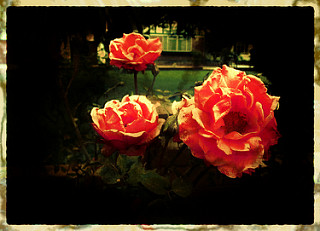

In [146]:
Image.open(str(roses[3]))

In [147]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:5]

[PosixPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/5012813078_99fb977616_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/14097745904_436c4ba1b4_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/5661431592_cea1108261_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/8712267813_f7a9be2ec5.jpg')]

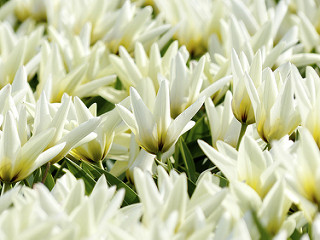

In [148]:
Image.open(str(tulips[10]))

In [149]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [150]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [151]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/8060338380_eb6c806624_n.jpg'

In [152]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 320, 3)

In [153]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [154]:
X, y = [],[]

for flower_name,images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_image = cv2.resize(img,IMAGE_SHAPE)
    X.append(resized_image)
    y.append(flowers_labels_dict[flower_name])

In [155]:
X  = np.array(X)
y = np.array(y)

In [156]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [157]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

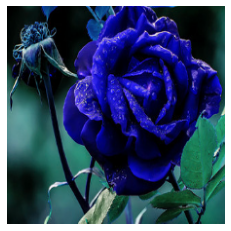

In [158]:
plt.axis('off');
plt.imshow(X[0]);

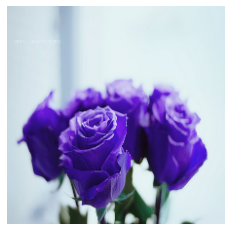

In [159]:
plt.axis('off');
plt.imshow(X[1]);

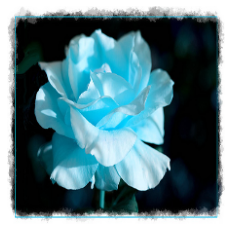

In [160]:
plt.axis('off');
plt.imshow(X[2]);

In [162]:
predicted = classifier.predict(np.array([X[0],X[1],X[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

array([550, 722, 722])

In [165]:
image_labels[722]

'pillow'

In [167]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [169]:
num_of_flowers = 5

model = keras.Sequential([
                          pretrained_model_without_top_layer,
                          tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_6 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [172]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']);
model.fit(X_train_scaled,y_train,epochs=5);

Epoch 1/5
86/86 [==============================] - 65s 745ms/step - loss: 0.2167 - acc: 0.9335
Epoch 2/5
86/86 [==============================] - 64s 748ms/step - loss: 0.1752 - acc: 0.9517
Epoch 3/5
86/86 [==============================] - 65s 750ms/step - loss: 0.1520 - acc: 0.9593
Epoch 4/5
86/86 [==============================] - 65s 752ms/step - loss: 0.1319 - acc: 0.9709
Epoch 5/5
86/86 [==============================] - 65s 752ms/step - loss: 0.1192 - acc: 0.9731


In [173]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 22s 744ms/step - loss: 0.3960 - acc: 0.8704


[0.39602571725845337, 0.8703703880310059]